In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
A = np.ones([10,10]) - np.identity(10)

In [3]:
A = [   [0,1,0,0,0,0,0,0,1,1],
        [1,0,1,0,0,0,0,0,0,0],
        [0,1,0,1,0,0,0,0,0,0],
        [0,0,1,0,1,0,0,0,0,0],
        [0,0,0,1,0,1,0,0,0,0],
        [0,0,0,0,1,0,1,0,0,0],
        [0,0,0,0,0,1,0,1,0,0],
        [0,0,0,0,0,0,1,0,1,0],
        [1,0,0,0,0,0,0,1,0,1],
        [1,0,0,0,0,0,0,0,1,0]]

A = np.array(A)
B = np.array([1,0,0,0,0,0,0,0,0,1])
b = np.zeros([10,10])
b[0][0] = 1
b[9][9] = 1
D = np.identity(10)
for i in range(10):
    D[i][i] = A.sum(axis=1)[i]
L = D - A
M =  L + b
eig,eig_matrix = np.linalg.eig(M)
k = 1 / (4* 0.5 * (1-0.5*0.5)*np.min(eig))

In [4]:
eig,eig_matrix = np.linalg.eig(M)

In [5]:
M

array([[ 4., -1.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  3., -1.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  3.]])

In [6]:
dt = 0.01
A = [   [0,1,0,0,0,0,0,0,1,1],
        [1,0,1,0,0,0,0,0,0,0],
        [0,1,0,1,0,0,0,0,0,0],
        [0,0,1,0,1,0,0,0,0,0],
        [0,0,0,1,0,1,0,0,0,0],
        [0,0,0,0,1,0,1,0,0,0],
        [0,0,0,0,0,1,0,1,0,0],
        [0,0,0,0,0,0,1,0,1,0],
        [1,0,0,0,0,0,0,1,0,1],
        [1,0,0,0,0,0,0,0,1,0]]

A = np.array(A)
B = np.array([1,0,0,0,0,0,0,0,0,1])
b = np.zeros([10,10])
b[0][0] = 1
b[9][9] = 1
D = np.identity(10)
for i in range(10):
    D[i][i] = A.sum(axis=1)[i]
L = D - A
M =  L + b
eig,eig_matrix = np.linalg.eig(M)
k = 1 / (4* 0.5 * (1-0.5*0.5)*np.min(eig))
class VehicleState:
    def __init__(self, x=0.0, y=0.0, yaw=0.0, v=0.0):
        self.x = x
        self.v = v

def update(state, a):
    state.x = state.x + state.v * dt
    state.v = state.v + a * dt
    return state


def update_follower(followerList,v):
    for i in range(0,10):
        followerList[i].v = v[i]
        followerList[i].x = followerList[i].x + followerList[i].v * dt
    return followerList   


def controller(leader,follower,k):
    v = leader.v
    x = [follower[i].x for i in range(10)]
    u = [0,0,0,0,0,0,0,0,0,0]
    for i in range(0,10):
        sigma = 0
        for j in range(0,10):
            a_ij = A[i][j] 
            b_i0 = B[i]
            sigma = sigma +  a_ij * (x[i] - x[j]) + b_i0 * (x[i] -leader.x)
        u[i] = (-k) * sigma + v
    return u

In [7]:
eig

array([5.07170872, 0.08611247, 0.69722436, 0.50658682, 1.62571259,
       1.83462312, 4.30277564, 3.80304227, 3.26623708, 2.80597694])

In [8]:
k = 1 / (4* 0.5 * (1-0.5*0.5)*np.min(eig))
k

7.741813035888467

In [16]:
[[i*2-5] for i in range(10)]

[[-5], [-3], [-1], [1], [3], [5], [7], [9], [11], [13]]

In [9]:
k = 1 / (4* 0.5 * (1-0.5*0.5)*eig[0]) + 10

i = 0
time = 0
T = 5 # 模拟时间
t = [0.0]
# 设置车辆的初始状态 leader
leader = VehicleState(x=0, v=0.0)
leader_x = [leader.x]
leader_v = [leader.v]
# 设置车辆的初始状态 follower
followerList = [VehicleState(x = i*2-5,v=0) for i in range(10)]
follower = [[followerList[i].x for i in range(10) ]]
velocity = [[followerList[i].v for i in range(10) ]]
#初始化加速度
a = []
for n in range(0,int(T/dt)+100):
    if n<50:
        a.append( 1 )
    else:
        a.append( 0 )
#进行多轮迭代更新
while T >= time :
    
    leader = update(leader,a[i])

    v = controller(leader,followerList,k)
    followerList = update_follower(followerList,v)

    leader_x.append(leader.x)
    leader_v.append(leader.v)
    follower.append([followerList[j].x for j in range(10) ] )
    velocity.append([followerList[j].v for j in range(10) ])
    t.append(time)   
    time = time + dt


leader_x = np.array(leader_x)
follower = np.array(follower)
velocity = np.array(velocity)

#### 画出位置变化

Text(0.5,1,'The iteration period is 10ms')

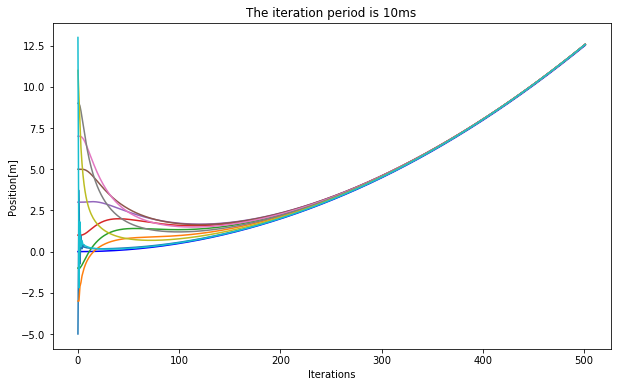

In [10]:
plt.figure(figsize=(10,6))

plt.plot(leader_x,"-b", label="trajectory")
for n in range(10):
    plt.plot(follower[:,n])
plt.xlabel('Iterations')             
plt.ylabel('Position[m]')
plt.title("The iteration period is 10ms")

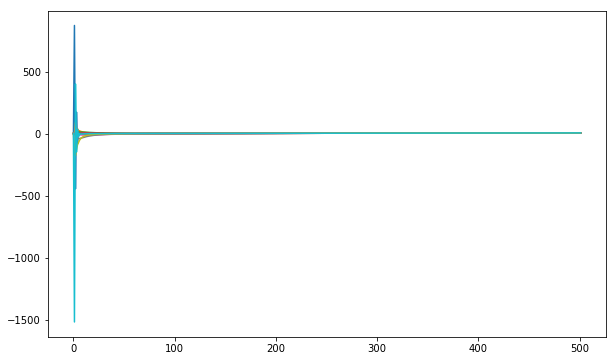

In [11]:
plt.figure(figsize=(10,6))

plt.plot(leader_v,"-b", label="trajectory")
for n in range(10):
    plt.plot(velocity[:,n])


#### 画出速度变化

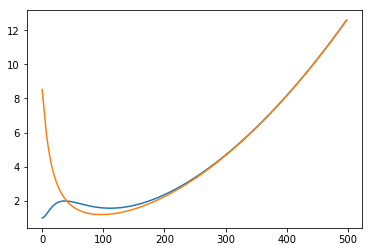

In [12]:
# plt.plot(leader_v,"-b", label="trajectory")
# plt.plot(follower[:,1], label="trajectory")
plt.plot(follower[3:,3], label="trajectory")
# plt.plot(follower[:,5], label="trajectory")
plt.plot(follower[3:,7], label="trajectory")